In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

from qiskit import BasicAer, Aer
from qiskit.aqua.algorithms import AmplitudeEstimation
from qiskit.aqua.components.uncertainty_models import LogNormalDistribution
from qiskit.aqua.components.uncertainty_problems import UnivariateProblem
from qiskit.aqua.components.uncertainty_problems import UnivariatePiecewiseLinearObjective as PwlObjective

# Load distribution

### Basic parameters

In [2]:
# parameters for considered random distribution
S = 2.0 # initial spot price
vol = 0.4 # volatility of 40%
r = 0.05 # annual interest rate of 4%
T = 40 / 365 # 40 days to maturity

# resulting parameters for log-normal distribution
mu = ((r - 0.5 * vol**2) * T + np.log(S))
sigma = vol * np.sqrt(T)
mean = np.exp(mu + sigma**2/2)
variance = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)
stddev = np.sqrt(variance)

# lowest and highest value considered for the spot price; in between, an equidistant discretization is considered.
low  = np.maximum(0, mean - 3*stddev)
high = mean + 3*stddev

### Encode the log-normal distribution to quantum states

number of loaded qubits: 1
Computational time: 0.0010006427764892578 (seconds)


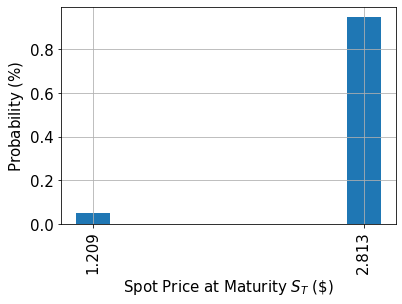

number of loaded qubits: 3
Computational time: 0.002000570297241211 (seconds)


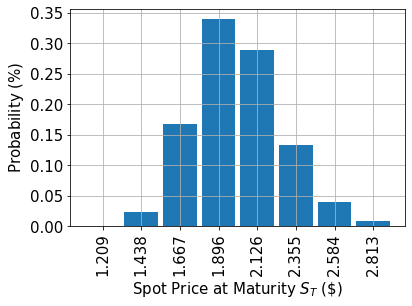

number of loaded qubits: 5
Computational time: 0.004001617431640625 (seconds)


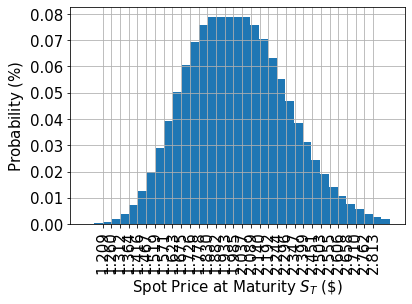

number of loaded qubits: 7
Computational time: 0.01800394058227539 (seconds)


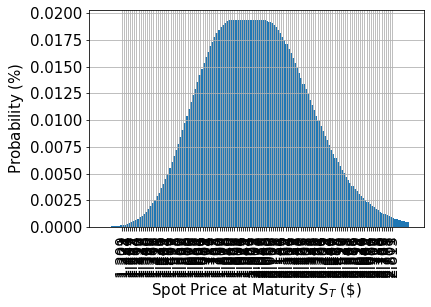

initial spot price:   	2.0000
volatility:           	0.4000
annual interest rate :	0.0500
maturty (of one year):	0.1096


In [19]:
# number of qubits to represent the uncertainty
n1 = 1
n2 = 9
dn = 2

for n in range(n1, n2, dn):
    # construct circuit factory for uncertainty model
    print('number of loaded qubits:', n)
    start_time = time.time()
    uncertainty_model = LogNormalDistribution(n, mu=mu, sigma=sigma, low=low, high=high)
    end_time = time.time()
    cost_time = end_time - start_time
    print('Computational time: %s (seconds)' % cost_time)
    
    # plot probability distribution
    x = uncertainty_model.values
    y = uncertainty_model.probabilities
    plt.bar(x, y, width=0.2)
    plt.xticks(x, size=15, rotation=90)
    plt.yticks(size=15)
    plt.grid()
    plt.xlabel('Spot Price at Maturity $S_T$ (\$)', size=15)
    plt.ylabel('Probability ($\%$)', size=15)
    plt.show()
    
    

# print the parameters
print('initial spot price:   \t%.4f' % S)
print('volatility:           \t%.4f' % vol)
print('annual interest rate :\t%.4f' % r)
print('maturty (of one year):\t%.4f' % T)


### Compare $m$ to the computation time

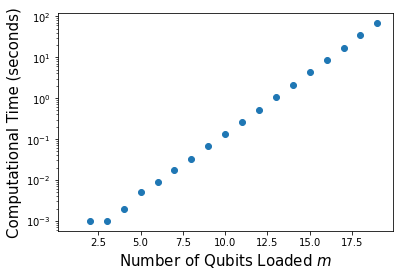

In [15]:
n_min = 1
n_max = 20
dn = 1

time_list = []
order_list = []

for n in range(n_min, n_max, dn):
    # construct circuit factory for uncertainty model
    start_time = time.time()
    uncertainty_model = LogNormalDistribution(n, mu=mu, sigma=sigma, low=low, high=high)
    end_time = time.time()
    cost_time = end_time - start_time
    time_list.append(cost_time)
    
    order_list.append(n)

# plot computational time list
plt.plot(order_list, time_list, 'o')
plt.yscale('log')
plt.xlabel('Number of Qubits Loaded $m$', size=15)
plt.ylabel('Computational Time (seconds)', size=15)
plt.show()